In [1]:
from matplotlib import pyplot as plt
from whar_datasets.adapters.torch_adapter import TorchAdapter
from whar_datasets.support.getter import WHARDatasetID, get_whar_cfg

In [ ]:
# given a dataset id, returns dataset config
cfg = get_whar_cfg(dataset_id=WHARDatasetID.WISDM)

In [ ]:
# given a dataset config, performs preprocessing, and returns dataset
dataset = TorchAdapter(cfg=cfg)

In [ ]:
# given a fold, performs postprocessing, and return dataloaders
loaders = dataset.get_dataloaders(scv_group_index=0, batch_size=128)
train_loader, val_loader, test_loader = loaders

In [11]:
cfg = get_whar_cfg(WHARDatasetID.WISDM)

cfg.parallelize = False
cfg.in_memory = True
force_recompute = False
# force_recompute = [False, True, True]

dataset = TorchAdapter(cfg, force_recompute)

2025-10-01 13:19:03,446 - whar-datasets - INFO - Running DownloadingStep
2025-10-01 13:19:03,447 - whar-datasets - INFO - Checking hash for DownloadingStep
2025-10-01 13:19:03,448 - whar-datasets - INFO - Hash is up to date
2025-10-01 13:19:03,449 - whar-datasets - INFO - Running ParsingStep
2025-10-01 13:19:03,449 - whar-datasets - INFO - Checking hash for ParsingStep
2025-10-01 13:19:03,450 - whar-datasets - INFO - Hash is up to date
2025-10-01 13:19:03,451 - whar-datasets - INFO - Running WindowingStep
2025-10-01 13:19:03,451 - whar-datasets - INFO - Checking hash for WindowingStep
2025-10-01 13:19:03,453 - whar-datasets - INFO - Hash is up to date
2025-10-01 13:19:03,453 - whar-datasets - INFO - Loading windowing
2025-10-01 13:19:03,465 - whar-datasets - INFO - activity_ids from 0 to 5
2025-10-01 13:19:03,466 - whar-datasets - INFO - subject_ids from 0 to 35


In [12]:
train_loader, val_loader, test_loader = dataset.get_dataloaders(
    batch_size=32, scv_group_index=0, force_recompute=False
)

2025-10-01 13:19:06,515 - whar-datasets - INFO - train: 16123 | val: 1792 | test: 4493
2025-10-01 13:19:06,517 - whar-datasets - INFO - Running SamplingStep
2025-10-01 13:19:06,518 - whar-datasets - INFO - Checking hash for SamplingStep
2025-10-01 13:19:06,520 - whar-datasets - INFO - Hash is up to date
2025-10-01 13:19:06,521 - whar-datasets - INFO - Loading samples
Loading samples: 100%|██████████| 22408/22408 [00:02<00:00, 9344.84it/s] 


In [13]:
weights = dataset.get_class_weights(test_loader)
print(weights)

{1: 0.28531494499013477, 0: 0.3696433716789781, 2: 0.9598558334544658, 3: 0.9925317767210007, 4: 1.060204397861069, 5: 2.3324496752943515}


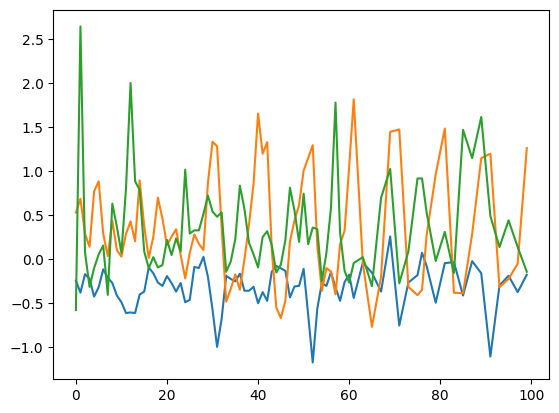

In [22]:
y_batch, x_batch = next(iter(train_loader))
x = x_batch[0].numpy()
plt.plot(x)
plt.show()